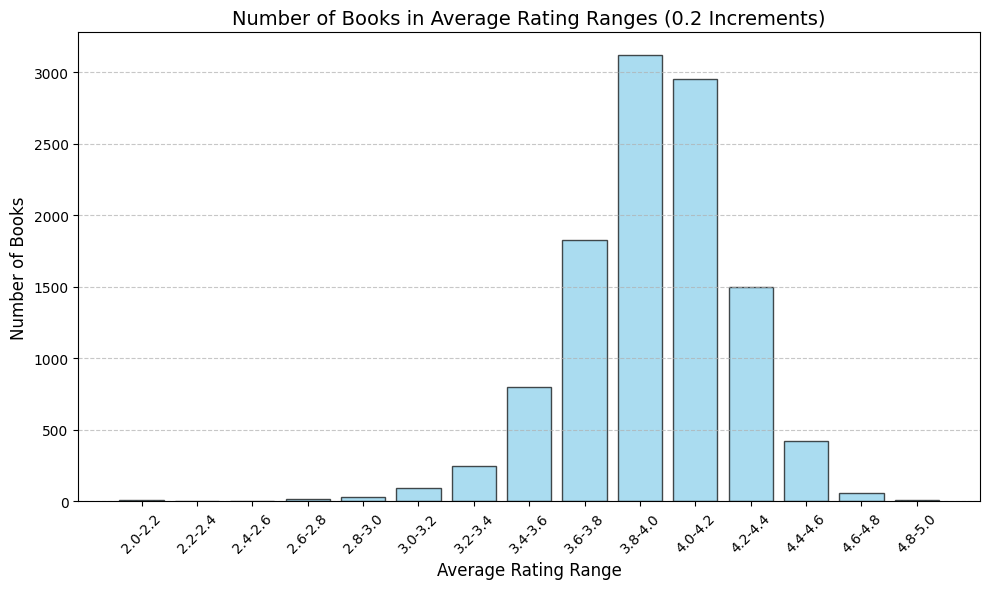

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace with the correct file path)
file_path = 'Goodreads_books_with_genres.csv'
data = pd.read_csv(file_path)

# Extract the 'average_rating' column and filter for valid ratings between 2 and 5
ratings = data['average_rating']
ratings = ratings[(ratings >= 2) & (ratings <= 5)]

# Define bins for ranges of 0.2 from 2 to 5
bins = [round(i, 1) for i in list(range(20, 51, 2))]  # 2 to 5 in 0.2 increments
bins = [x / 10 for x in range(20, 51, 2)]  # Create the bins dynamically

# Calculate the histogram (frequency of books in each bin)
hist, bin_edges = pd.cut(ratings, bins=bins, include_lowest=True, right=False, retbins=True)
bin_counts = hist.value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
bin_labels = [f"{round(edge, 1)}-{round(bin_edges[i+1], 1)}" for i, edge in enumerate(bin_edges[:-1])]
plt.bar(bin_labels, bin_counts, color='skyblue', edgecolor='black', alpha=0.7)

# Customize the chart
plt.title('Number of Books in Average Rating Ranges (0.2 Increments)', fontsize=14)
plt.xlabel('Average Rating Range', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


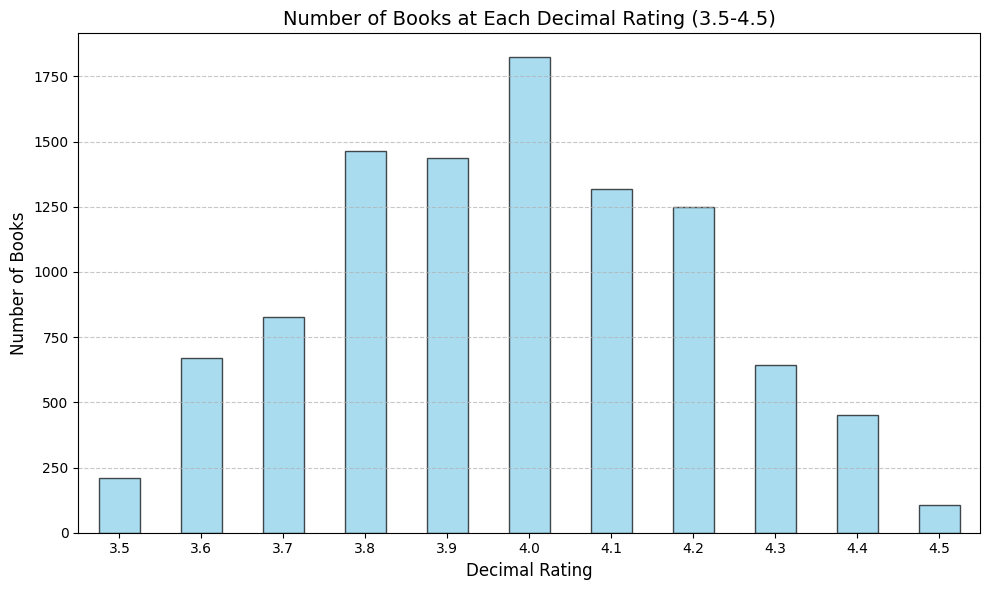

60.437083496667974

In [20]:
import pandas as pd


ratings_filtered = ratings[(ratings >= 3.5) & (ratings <= 4.5)]

# Calculate the percentage of books in the range 3.5-4.5
total_books = len(ratings)
books_in_range = len(ratings_filtered)
percentage_in_range = (books_in_range / total_books) * 100

# Count the number of books at each decimal point (rounded to 1 decimal place)
ratings_rounded = ratings_filtered.round(1)
decimal_counts = ratings_rounded.value_counts().sort_index()

# Display results
percentage_in_range, decimal_counts.to_dict()
# Plot the bar chart for decimal counts
plt.figure(figsize=(10, 6))
decimal_counts.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)

# Customize the chart
plt.title('Number of Books at Each Decimal Rating (3.5-4.5)', fontsize=14)
plt.xlabel('Decimal Rating', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()
# Calculate the percentage of books in the range 3.8-4.2 within the books in the range 3.5-4.5
books_in_38_42 = len(ratings_filtered[(ratings_filtered >= 3.8) & (ratings_filtered <= 4.2)])
percentage_38_42_within_35_45 = (books_in_38_42 / books_in_range) * 100

percentage_38_42_within_35_45


In [29]:
import pandas as pd
from itertools import combinations
from collections import defaultdict
import matplotlib.pyplot as plt
import networkx as nx

# Load the data
file_path = 'Goodreads_books_with_genres.csv'
data = pd.read_csv(file_path)

# Step 2: Preprocess Data
# Extract relevant columns
genres = data['genres']
ratings = data['average_rating']
#change the range of ratings to create specific subnetwork
data_filtered = data[(ratings >= 3.5) & (ratings <= 4)]

# Create sets of genres for each book
genre_lists = [set(str(g).split(';')) if isinstance(g, str) else set() for g in data_filtered['genres']]

# Step 3: Calculate Metrics
# Helper function to calculate genre co-occurrences (edges)
def calculate_genre_edges(genre_lists):
    genre_edges = defaultdict(int)
    for genre_list in genre_lists:
        for genre1, genre2 in combinations(genre_list, 2):
            genre_edges[tuple(sorted([genre1, genre2]))] += 1
    return genre_edges

# Calculate edges for the full dataset
genre_edges = calculate_genre_edges(genre_lists)

# Calculate unique genres (nodes)
unique_genres = set().union(*genre_lists)
num_genres = len(unique_genres)
print(num_genres)
# Total edges
total_edges = len(genre_edges)
print(total_edges)
# Possible edges (nC2)
possible_edges = num_genres * (num_genres - 1) / 2
network_density = total_edges / possible_edges


genre_network = nx.Graph()
for (genre1, genre2), weight in genre_edges.items():
    genre_network.add_edge(genre1, genre2, weight=weight)
metrics_summary = {
    "Number of Nodes (Genres)": num_genres,
    "Number of Edges (Genre Pairs)": total_edges,
    "Network Density": network_density,
}
metrics_summary

761
20021


{'Number of Nodes (Genres)': 761,
 'Number of Edges (Genre Pairs)': 20021,
 'Network Density': 0.0692336952762985}

In [22]:
node_metrics = []
for genre in unique_genres:
    degree = sum(1 for (g1, g2) in genre_edges.keys() if genre in [g1, g2])
    weighted_degree = sum(weight for (g1, g2), weight in genre_edges.items() if genre in [g1, g2])
   
    node_metrics.append({
        'Id': genre,
        'Label': genre,
        'Degree': degree,
        'Weighted Degree': weighted_degree,
        
    })
# print(count)
#Convert to DataFrame and Save
nodes_df = pd.DataFrame(node_metrics)
nodes_df.to_csv('NodesRatings.csv', index=False)

# Step 6: Export Edges
edges_data = [
    {'Source': genre1, 'Target': genre2, 'Type': 'Undirected', 'Weight': weight,}
    for (genre1, genre2), weight in genre_edges.items()
    
]
edges_df = pd.DataFrame(edges_data)
edges_df.to_csv('EdgesRatings.csv', index=False)

print("Nodes file saved as 'NodesRatings.csv'")
print("Edges file saved as 'EdgesRatings.csv'")

Nodes file saved as 'NodesRatings.csv'
Edges file saved as 'EdgesRatings.csv'


In [7]:
#Create Subnetworks Based on Rating Ranges
rating_ranges = [(3.8, 4.0), (4.0, 4.2), (4.2, 4.5)]
subnetworks = {}

for min_rating, max_rating in rating_ranges:
    # Filter data for the given rating range
    filtered_data = data[(data['average_rating'] >= min_rating) & (data['average_rating'] < max_rating)]

    
    # Create sets of genres for each book in this range
    genre_lists = [set(str(g).split(';')) if isinstance(g, str) else set() for g in filtered_data['genres']]
    
    # Calculate genre co-occurrences (edges)
    genre_edges = calculate_genre_edges(genre_lists)
    
    # Build the subnetwork for the rating range
    subnetwork = nx.Graph()
    for (genre1, genre2), weight in genre_edges.items():
        subnetwork.add_edge(genre1, genre2, weight=weight)
    subnetworks[(min_rating, max_rating)] = subnetwork

# Step 5: Calculate Betweenness Centrality and Extract Top 10 Edges
results = []

for (min_rating, max_rating), subnetwork in subnetworks.items():
    # Calculate betweenness centrality for edges
    edge_betweenness = nx.edge_betweenness_centrality(subnetwork, weight='weight')
    
    # Sort edges by betweenness centrality in descending order
    top_edges = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)[:10]
    
    # Save the results
    for (genre1, genre2), centrality in top_edges:
        results.append({
            'Rating Range': f"{min_rating}-{max_rating}",
            'Genre Pair': f"{genre1} - {genre2}",
            'Betweenness Centrality': centrality
        })

# Step 6: Display Results in a Table
results_df = pd.DataFrame(results)
print(results_df)

# Optionally, save the results to a CSV file
results_df.to_csv('top_edges_betweenness.csv', index=False)


   Rating Range                                         Genre Pair  \
0       3.8-4.0      Audiobook - Science Fiction,Planetary Romance   
1       3.8-4.0  Cultural,Africa - Scandinavian Lite...,Nordic ...   
2       3.8-4.0                Dc Comics,Superman - Sequential Art   
3       3.8-4.0    Cultural,International - Food and Drink,Cuisine   
4       3.8-4.0                Mythology,Greek Mythology - Tragedy   
5       3.8-4.0          Novels - Science Fiction,Sword and Planet   
6       3.8-4.0         Food and Drink,Food - Sequential Art,Komik   
7       3.8-4.0                          Horror - Dc Comics,Batman   
8       3.8-4.0  Anthologies,Collections - Dungeons and Dragons...   
9       3.8-4.0                   Computer Science,Coding - Design   
10      4.0-4.2               Romance - Harlequin,Harlequin Desire   
11      4.0-4.2          Health,Medicine - Health,Physical Therapy   
12      4.0-4.2                          Biography - Autobiography   
13      4.0-4.2     

In [9]:
placeholder for the results
top_edges_by_weight = []

# Step 2: Iterate through each subnetwork and extract the top edges by weight
for (min_rating, max_rating), subnetwork in subnetworks.items():
    # Extract edges and their weights
    edges = [(u, v, d['weight']) for u, v, d in subnetwork.edges(data=True)]
    
    # Sort edges by weight in descending order
    sorted_edges = sorted(edges, key=lambda x: x[2], reverse=True)[:10]
    
    # Add the top edges to the results
    for genre1, genre2, weight in sorted_edges:
        top_edges_by_weight.append({
            'Rating Range': f"{min_rating}-{max_rating}",
            'Genre Pair': f"{genre1} - {genre2}",
            'Weight': weight
        })

# Step 3: Create a DataFrame from the results
top_edges_by_weight_df = pd.DataFrame(top_edges_by_weight)


print(top_edges_by_weight_df)

# Optionally, save the results to a CSV file
top_edges_by_weight_df.to_csv('topedges.csv', index=False)


   Rating Range                               Genre Pair  Weight
0       3.8-4.0                       Fiction - Classics     844
1       3.8-4.0                     Fiction - Literature     805
2       3.8-4.0                         Fiction - Novels     803
3       3.8-4.0                    Literature - Classics     692
4       3.8-4.0                        Fiction - Fantasy     676
5       3.8-4.0  Historical,Historical Fiction - Fiction     612
6       3.8-4.0                      Novels - Literature     541
7       3.8-4.0                        Fiction - Mystery     539
8       3.8-4.0                        Novels - Classics     466
9       3.8-4.0                     History - Nonfiction     457
10      4.0-4.2                       Fiction - Classics     751
11      4.0-4.2                        Fantasy - Fiction     706
12      4.0-4.2                    Classics - Literature     577
13      4.0-4.2                     Fiction - Literature     561
14      4.0-4.2          

In [5]:
file_path = 'Goodreads_books_with_genres.csv'
data = pd.read_csv(file_path)

# Step 2: Preprocess Data
# Extract relevant columns
genres = data['genres']
ratings = data['average_rating']

# Round ratings to 1 decimal place
ratings_rounded = ratings.round(1)

# Filter data into 10 sets (3.5 to 4.5)
data_sets = {}
for rating in [3.5,3.6,3.7,3.8, 3.9, 4.0, 4.1, 4.2,4.3,4.4,4.5]:
    data_sets[rating] = data[ratings_rounded == rating]

# Create sets of genres for each rating group
genre_lists = {}
for rating, filtered_data in data_sets.items():
    genre_lists[rating] = [set(str(g).split(';')) if isinstance(g, str) else set() for g in filtered_data['genres']]

# Step 3: Calculate Jaccard Similarity
# Function to calculate Jaccard similarity
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    if union == 0:
        return 0
    return intersection / union

# Calculate unique genres for each group
unique_genres = {rating: set().union(*genre_list) for rating, genre_list in genre_lists.items()}

# Calculate Jaccard similarity between all pairs of groups
jaccard_similarities = {}
ratings = list(unique_genres.keys())
for i, rating1 in enumerate(ratings):
    for rating2 in ratings[i + 1:]:
        similarity = jaccard_similarity(unique_genres[rating1], unique_genres[rating2])
        jaccard_similarities[(rating1, rating2)] = similarity


sorted_jaccard_similarities = sorted(jaccard_similarities.items(), key=lambda x: x[1], )


for pair, similarity in sorted_jaccard_similarities:
    print(f"Jaccard Similarity between {pair[0]} and {pair[1]}: {similarity}")

Jaccard Similarity between 4.0 and 4.5: 0.309328968903437
Jaccard Similarity between 3.9 and 4.5: 0.3175438596491228
Jaccard Similarity between 3.8 and 4.5: 0.3181019332161687
Jaccard Similarity between 4.1 and 4.5: 0.329246935201401
Jaccard Similarity between 4.2 and 4.5: 0.33511586452762926
Jaccard Similarity between 3.7 and 4.5: 0.35365853658536583
Jaccard Similarity between 3.6 and 4.5: 0.3805309734513274
Jaccard Similarity between 4.3 and 4.5: 0.410958904109589
Jaccard Similarity between 3.5 and 4.5: 0.41424802110817943
Jaccard Similarity between 4.4 and 4.5: 0.4229828850855746
Jaccard Similarity between 3.5 and 4.0: 0.4631083202511774
Jaccard Similarity between 3.5 and 4.2: 0.47571189279731996
Jaccard Similarity between 3.5 and 4.1: 0.4825291181364393
Jaccard Similarity between 3.5 and 4.4: 0.4906054279749478
Jaccard Similarity between 3.5 and 4.3: 0.5060240963855421
Jaccard Similarity between 3.5 and 3.9: 0.5068259385665529
Jaccard Similarity between 3.5 and 3.8: 0.5154639175257

In [10]:
from collections import defaultdict
from itertools import combinations
import networkx as nx
import pandas as pd
import math
# Step 1: Load Data
file_path = 'Goodreads_books_with_genres.csv'
data = pd.read_csv(file_path)

# Step 2: Preprocess Data
# Extract relevant columns
genres = data['genres']
ratings = data['average_rating']

# Create sets of genres for each book
genre_lists = [set(str(g).split(';')) if isinstance(g, str) else set() for g in genres]

genre_edges_ratings = defaultdict(float)
genre_edges_counts = defaultdict(int)
# Step 3: Calculate Metrics
# Helper function to calculate genre co-occurrences with cumulative ratings and counts
def calculate_genre_edges_with_ratings(genre_lists, ratings):
    

    for genre_list, rating in zip(genre_lists, ratings):
        for genre1, genre2 in combinations(genre_list, 2):
            edge = tuple(sorted([genre1, genre2]))
            genre_edges_ratings[edge] += rating
            genre_edges_counts[edge] += 1

    # Calculate average rating for each edge
    genre_edges_avg_rating = {
        edge: genre_edges_ratings[edge] / genre_edges_counts[edge] * math.log(1 + genre_edges_counts[edge])
        for edge in genre_edges_ratings
    }
    return genre_edges_avg_rating

# Calculate edges with average ratings
genre_edges = calculate_genre_edges_with_ratings(genre_lists, ratings)
unique_genres = set().union(*genre_lists)
num_genres = len(unique_genres)
# Step 4: Create Network
genre_network_rating = nx.Graph()
for (genre1, genre2), avg_rating in genre_edges.items():
    genre_network_rating.add_edge(genre1, genre2, weight=avg_rating)
print(num_genres)


890


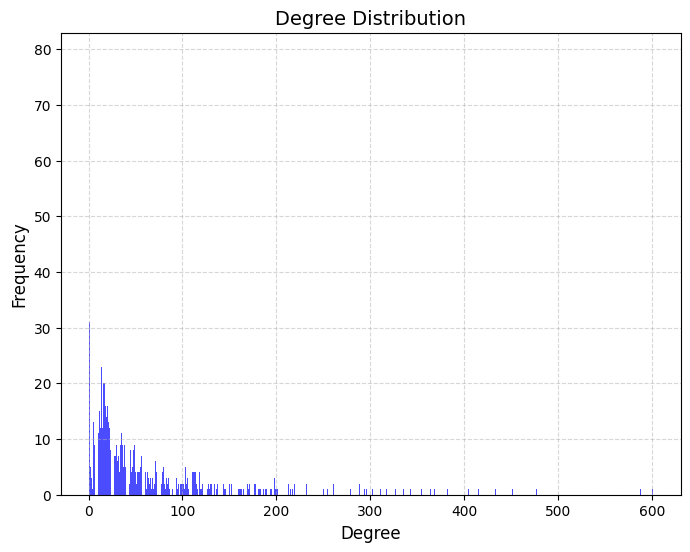

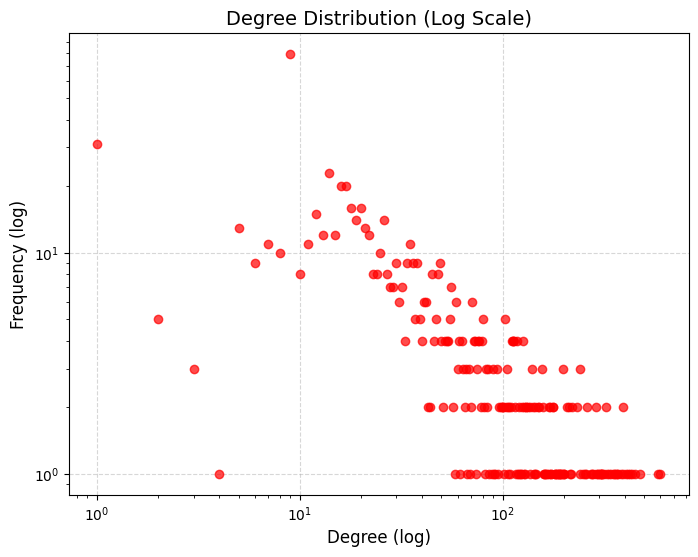

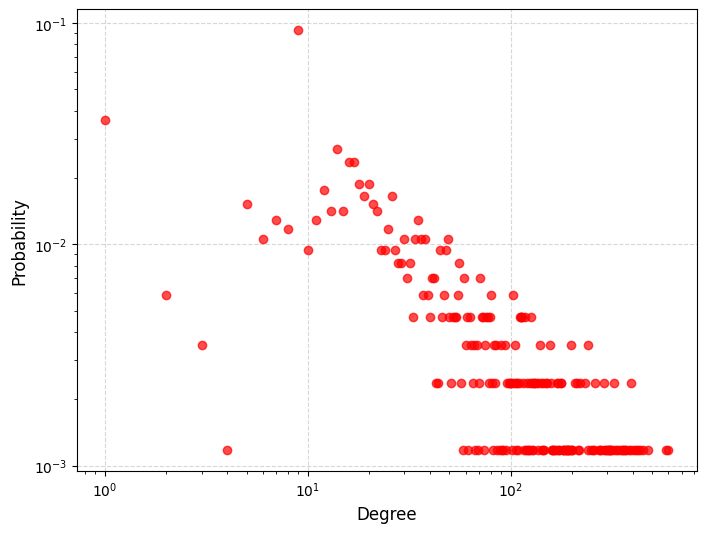

In [17]:
import matplotlib.pyplot as plt
import networkx as nx

# Compute Degree Distribution
degree_sequence = [d for _, d in genre_network_rating.degree()]
degree_count = {}
for degree in degree_sequence:
    degree_count[degree] = degree_count.get(degree, 0) + 1

degrees = list(degree_count.keys())
frequencies = list(degree_count.values())

#  Compute Degree Probability Distribution
total_nodes = sum(frequencies)
degree_probabilities = [freq / total_nodes for freq in frequencies]

# Plot Degree Distribution
plt.figure(figsize=(8, 6))
plt.bar(degrees, frequencies, color='blue', alpha=0.7)
plt.title("Degree Distribution", fontsize=14)
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# : Plot Degree Probability Distribution
plt.figure(figsize=(8, 6))
plt.loglog(degrees, degree_probabilities, 'o', color='red', alpha=0.7)

plt.xlabel("Degree", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
